# Let's work with another health dataset. Here we are practicing analyzing messy, and unclean data.

###### Feel free to download an updated copy of the data from the CDC here: https://catalog.data.gov/dataset/alzheimers-disease-and-healthy-aging-data
-This Jupyter Notebook was written by Robert Feldstein on December 28th, 2022.

In [179]:
import pandas as pd
import sklearn as sk
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st

## Let's take a look at the data to get a better sense of what we are working with. 
#### Government datasets like these are notoriously disorganized and hard to interpret. 

In [180]:
df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv',low_memory=False)
df.head()

,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,NaN,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,15,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
1,NaN,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,16,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
2,NaN,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,16,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
3,NaN,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,NaN,...,Q08,NaN,16,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
4,NaN,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,NaN,...,Q27,NaN,18,AGE,AGE_OVERALL,GENDER,MALE,NaN,NaN,NaN


## Look's like we have a lot of NaN values here. 
Let's check if some of these columns are completely empty.  If they have no data, we can drop them from the table and save some memory! 

In [181]:
#Here is a quick way to check if entire columns are null
"""
Returns true if the entire series is filled with null values, false otherwise.
    Parameter series: A pandas column
    Precondition: series represents an entire pandas column 
"""
def colisnull(series):
    return series.isnull().all()

#Let's make an array of all the completely empty columns in our dataset
#Here is some nice list comprehension to get a list of all the column names!
empty_columns = [i for i in df.columns if colisnull(df[i])]


#Now we simply drop these columns, and we will have an easier to read dataset 
df = df.drop(empty_columns,axis=1)
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE


### And just like that we removed 9 columns which contained no information! 
For the sake of improved analysis, I will also be removing columns which contain repetitive information, or information that we cannot decode (like the Government TopicID or Geolocation). This data is certainly useful, but it's more set for ArcGIS. If you are interested in analyzing geographic data, feel free to look at another of my projects: "Projecting Future Urban Flooding". 

https://arcg.is/e49fP

In [182]:
#Further removing of columns
df = df.drop(["LocationAbbr","Datasource","Geolocation","ClassID","TopicID","LocationID","Data_Value_Footnote_Symbol","Data_Value_Footnote"],axis=1)
df.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,...,High_Confidence_Limit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,26.3,...,29,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,24.0,...,27,Age Group,50-64 years,NaN,NaN,Q27,AGE,5064,OVERALL,OVERALL
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,35.7,...,39.1,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
3,2018,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,Mean,4.8,...,5.5,Age Group,50-64 years,NaN,NaN,Q08,AGE,5064,OVERALL,OVERALL
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,13.7,...,15.4,Age Group,Overall,Gender,Male,Q27,AGE,AGE_OVERALL,GENDER,MALE


In [183]:
#Furthermore, it looks like the Data_Value and Data_Value_Alt columns are exactly the same, let's check!
val = (df["Data_Value"].dropna() == df["Data_Value_Alt"].dropna()).all()
if val:
    df = df.drop(["Data_Value_Alt"],axis=1)
df.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,...,High_Confidence_Limit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,26.3,...,29,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,24.0,...,27,Age Group,50-64 years,NaN,NaN,Q27,AGE,5064,OVERALL,OVERALL
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,35.7,...,39.1,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
3,2018,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,Mean,4.8,...,5.5,Age Group,50-64 years,NaN,NaN,Q08,AGE,5064,OVERALL,OVERALL
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,13.7,...,15.4,Age Group,Overall,Gender,Male,Q27,AGE,AGE_OVERALL,GENDER,MALE


### Finally, it looks like there are plenty of rows that are missing from Data_Value
The data from this set is aggregated from many different statistical studies across states. We cannot simply interpolate the data, so instead we will drop the missing columns.

In [184]:
df = df[df["Data_Value"].notnull()]
df.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,...,High_Confidence_Limit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,26.3,...,29,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,24.0,...,27,Age Group,50-64 years,NaN,NaN,Q27,AGE,5064,OVERALL,OVERALL
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,35.7,...,39.1,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
3,2018,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,Mean,4.8,...,5.5,Age Group,50-64 years,NaN,NaN,Q08,AGE,5064,OVERALL,OVERALL
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,13.7,...,15.4,Age Group,Overall,Gender,Male,Q27,AGE,AGE_OVERALL,GENDER,MALE


#### We took the dataset from 214000 rows to 144629 rows! That's a lot of saved storage!

In [185]:
#Let's check if after removing those rows certain columns became null again
empty_columns = [i for i in df.columns if colisnull(df[i])]
df = df.drop(empty_columns,axis=1)
df.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,...,High_Confidence_Limit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,26.3,...,29,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,24.0,...,27,Age Group,50-64 years,NaN,NaN,Q27,AGE,5064,OVERALL,OVERALL
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,35.7,...,39.1,Age Group,50-64 years,NaN,NaN,Q43,AGE,5064,OVERALL,OVERALL
3,2018,2018,Idaho,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,Mean,4.8,...,5.5,Age Group,50-64 years,NaN,NaN,Q08,AGE,5064,OVERALL,OVERALL
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,Percentage,13.7,...,15.4,Age Group,Overall,Gender,Male,Q27,AGE,AGE_OVERALL,GENDER,MALE


### Taking a look at the data

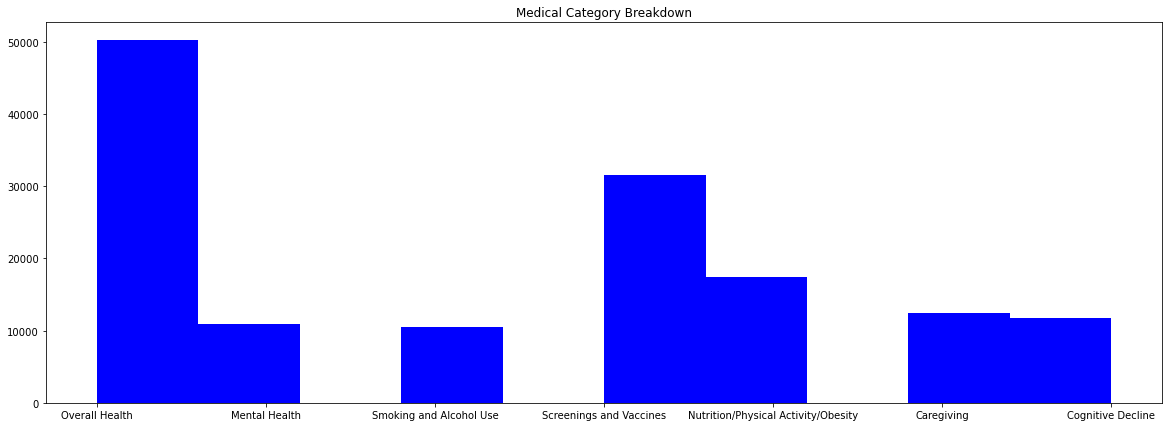

In [186]:
#Now after all of that cleaning we can finally get to work visualizing the data on hand
#First, let's check to see the different categories of data 
plt.rcParams["figure.figsize"] = (20,7)
fig = plt.hist(df["Class"],color = 'blue')
plt.title("Medical Category Breakdown")
plt.show()

## Choose a Category and Question to Analyze

I like the following question: "Percentage of older adults who reported subjective cognitive decline or memory loss that is happening more often or is getting worse in the preceding 12 months"

This question is labeled 'Q30' in the QuestionID column. 

Let's see what type of analysis we can perform! 

In [187]:
#Let's choose one of the questions to analyze
q1 = df[df["QuestionID"] == 'Q30'].sort_values('LocationDesc')
#To make our lives easier we are going to sort the data only to the long-running five year studies
q1 = q1[q1["YearStart"] == 2015]
q1 = q1[q1["YearEnd"] == 2020]
q1.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,...,High_Confidence_Limit,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,QuestionID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
6543,2015,2020,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,15.2,...,19.1,Age Group,50-64 years,Gender,Male,Q30,AGE,5064,GENDER,MALE
3680,2015,2020,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,14.8,...,17.4,Age Group,Overall,Gender,Male,Q30,AGE,AGE_OVERALL,GENDER,MALE
10145,2015,2020,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,13.8,...,18.2,Age Group,50-64 years,Race/Ethnicity,"Black, non-Hispanic",Q30,AGE,5064,RACE,BLK
3885,2015,2020,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,14.2,...,16.5,Age Group,65 years or older,Race/Ethnicity,"White, non-Hispanic",Q30,AGE,65PLUS,RACE,WHT
4857,2015,2020,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,15.0,...,17.4,Age Group,50-64 years,NaN,NaN,Q30,AGE,5064,OVERALL,OVERALL


## Type of Analysis

So we've got many different studies from the same state, but values are stratified by Gender, Race, and Age.
Let's see if there's a difference in Data_Value between different races. This looks like it could be a good candidate for a paired-sample t-test. 

In [188]:
#Breaking the data into different race datasets

race = q1[q1["StratificationCategoryID2"] == "RACE"]

blk = q1[q1["StratificationID2"] == 'BLK']
wht = q1[q1["StratificationID2"] == 'WHT']
naa = q1[q1["StratificationID2"] == 'NAA']
his = q1[q1["StratificationID2"] == 'HIS']
asn = q1[q1["StratificationID2"] == 'ASN']

### Filter Data for Direct Comparison

In [189]:
#Final goal is to make a scatter plot colored by race
blk_filtered = blk[blk["StratificationID1"] == 'AGE_OVERALL']
wht_filtered = wht[wht["StratificationID1"] == 'AGE_OVERALL']

## Merge the Data

Here we are merging the Black and White datasets. We note that there is an unequal distribution of survey data. More survey results are available for White Americans than Black Americans. Again, interpolation is not a direct option, so instead we will filter the dataset into one with only the states which have data points for Black and White Americans. 

In [190]:
#Merge the datasets by State
merged = pd.merge(wht_filtered, blk_filtered, on='LocationDesc', how='outer')
merged = merged[merged['QuestionID_y'].notnull()]
#df = df[df["Data_Value"].notnull()]
#merged
white = merged["Data_Value_x"]
black = merged["Data_Value_y"]
merged.head()

,YearStart_x,YearEnd_x,LocationDesc,Class_x,Topic_x,Question_x,Data_Value_Unit_x,DataValueTypeID_x,Data_Value_Type_x,Data_Value_x,...,High_Confidence_Limit_y,StratificationCategory1_y,Stratification1_y,StratificationCategory2_y,Stratification2_y,QuestionID_y,StratificationCategoryID1_y,StratificationID1_y,StratificationCategoryID2_y,StratificationID2_y
0,2015,2020,Alabama,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,14.6,...,17.5,Age Group,Overall,Race/Ethnicity,"Black, non-Hispanic",Q30,AGE,AGE_OVERALL,RACE,BLK
3,2015,2020,Arkansas,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,11.8,...,17.9,Age Group,Overall,Race/Ethnicity,"Black, non-Hispanic",Q30,AGE,AGE_OVERALL,RACE,BLK
6,2015,2020,Connecticut,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,7.2,...,15,Age Group,Overall,Race/Ethnicity,"Black, non-Hispanic",Q30,AGE,AGE_OVERALL,RACE,BLK
7,2015,2020,Delaware,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,8.5,...,14.3,Age Group,Overall,Race/Ethnicity,"Black, non-Hispanic",Q30,AGE,AGE_OVERALL,RACE,BLK
8,2015,2020,District of Columbia,Cognitive Decline,Subjective cognitive decline or memory loss am...,Percentage of older adults who reported subjec...,%,PRCTG,Percentage,6.6,...,13.1,Age Group,Overall,Race/Ethnicity,"Black, non-Hispanic",Q30,AGE,AGE_OVERALL,RACE,BLK


## Plot an Initial Histogram to Compare the Data

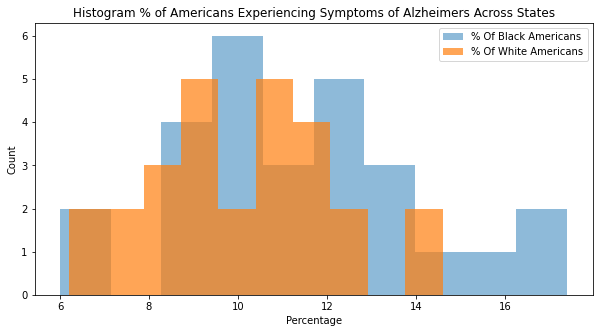

In [191]:
plt.rcParams["figure.figsize"] = (10,5)
plt.hist(black,label = '% Of Black Americans',alpha = 0.5)
plt.hist(white,label = '% Of White Americans',alpha = 0.7)
plt.title("Histogram % of Americans Experiencing Symptoms of Alzheimers Across States")
plt.xlabel("Percentage")
plt.ylabel("Count")
plt.legend()
plt.show()

## Let's Do A Paired Sample T-Test to determine if there is a statistically significant difference between the two samples


We are comparing across 27 different states to see if one population tends to experience a greater amount of reported cognitive memory decline. We have a sample size less than 30, so we will be doing a t-test. Our data is paired across states, so we will particularly be performing a paired sample t-test, making usage of the scipy library. Furthermore, we are going to do a one sided t-test based on the histogram above, where we predice Black americans to have a higher mean percentage than white americans.

H0: There is no difference in the population means in percentages of Alzheimer related symmptoms between White Americans and Black Americans across the 27 chosen states. 

Ha: The mean percantage of White Americans experiencing Alzheimer symptoms is less than the mean percentage of Black Americans across the 27 chosen states.

In [192]:
t_val = st.ttest_rel(white,black,alternative='less')
t_val

Ttest_relResult(statistic=-2.6437381940938, pvalue=0.006856286254937451)

### Our p-value was 0.00686, which is highly significant. 
We can reject the null hypothesis and conclude that the mean percentage of White Americans experiencing Alzheimer symptoms is less than the mean percentage of Black Americans across the 27 chosen states. 

Thank you for reading through this Jupyter Notebook! Data cleaning is quite painful, but allows us to perform some powerful statistical tests. 